In [ ]:
import zipfile
import os
import seaborn as sns
import numpy as np
import pandas as pd
from glob import glob
import shutil, sys 
import os
import cv2
from matplotlib import pyplot as plt
import PIL.Image
from IPython.display import Image
from sklearn.metrics import confusion_matrix

import torch
import torch.nn as nn
import torchvision
from torchvision import models,transforms,datasets
import time
from tqdm import tqdm
import random
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
filepath = '/content/drive/MyDrive/523_DeepLearning/FinalProject/Data/'

In [ ]:
dataList = pd.read_csv(filepath+'driver_imgs_list.csv') 

In [ ]:
dataList

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg
...,...,...,...
22419,p081,c9,img_56936.jpg
22420,p081,c9,img_46218.jpg
22421,p081,c9,img_25946.jpg
22422,p081,c9,img_67850.jpg


In [ ]:
#!unzip /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/imgs.zip

In [ ]:
!unzip "/content/drive/MyDrive/523_DeepLearning/FinalProject/Data/train.zip" -d "/content/drive/MyDrive/523_DeepLearning/FinalProject/Data/OriginalData"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/OriginalData/train/c4/img_17718.jpg  
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/OriginalData/train/c4/img_6731.jpg  
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/OriginalData/train/c4/img_83623.jpg  
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/OriginalData/train/c4/img_41576.jpg  
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/OriginalData/train/c4/img_13230.jpg  
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/OriginalData/train/c4/img_42719.jpg  
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/OriginalData/train/c4/img_49658.jpg  
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/OriginalData/train/c4/img_84158.jpg  
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/Origina

In [ ]:
print('Number of images in training set = ',str(len(glob(filepath+'OriginalData/train/*/*.jpg'))))


Number of images in training set =  22424


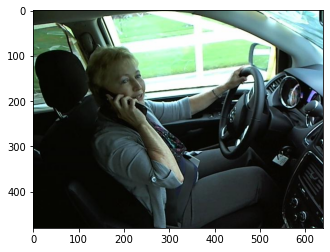

In [ ]:
img = cv2.imread(filepath+"OriginalData/train/c2/img_258.jpg")
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()

In [ ]:
!unzip "/content/drive/MyDrive/523_DeepLearning/FinalProject/Data/train.zip" -d "/content/drive/MyDrive/523_DeepLearning/FinalProject/Data/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/train/c4/img_17718.jpg  
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/train/c4/img_6731.jpg  
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/train/c4/img_83623.jpg  
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/train/c4/img_41576.jpg  
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/train/c4/img_13230.jpg  
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/train/c4/img_42719.jpg  
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/train/c4/img_49658.jpg  
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/train/c4/img_84158.jpg  
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/train/c4/img_18417.jpg  
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/train/c4/img_13

In [ ]:
#os.rename(filepath+"train",filepath+"TrainData")

In [ ]:
len(dataList[dataList['subject'].isin(['p026','p012'])]['img'].tolist())

2019

In [ ]:
filestotransfer = dataList[dataList['subject'].isin(['p012','p026'])]['img'].tolist()

In [ ]:
for fname in filestotransfer:
    shutil.copy2(glob(filepath+"train/*/"+fname)[0], "/content/drive/MyDrive/523_DeepLearning/FinalProject/Data/TestData/")

In [ ]:
print('Number of images in training set = ',str(len(glob(filepath+'train/*/*'))))

Number of images in training set =  22424


In [ ]:
for fname in filestotransfer:
    os.remove(glob(filepath+"train/*/"+fname)[0])

In [ ]:
print('Number of images in training set = ',str(len(glob(filepath+'train/*/*.jpg'))))
print('Number of images in testing set = ',str(len(glob(filepath+'TestData/*.jpg'))))


Number of images in training set =  20405
Number of images in testing set =  2019


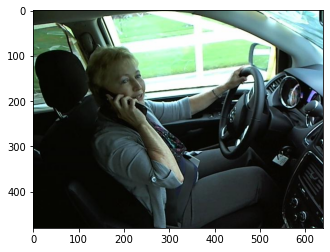

In [ ]:
img = cv2.imread(filepath+"train/c2/img_258.jpg")
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()

In [ ]:
classes = [c for c in os.listdir(filepath+"train") if not c.startswith(".")]
classes.sort()
print(classes)

['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']


In [ ]:
class_dict = {0 : "safe driving",
              1 : "texting - right",
              2 : "talking on the phone - right",
              3 : "texting - left",
              4 : "talking on the phone - left",
              5 : "operating the radio",
              6 : "drinking",
              7 : "reaching behind",
              8 : "hair and makeup",
              9 : "talking to passenger"}

Total number of training data : 20405


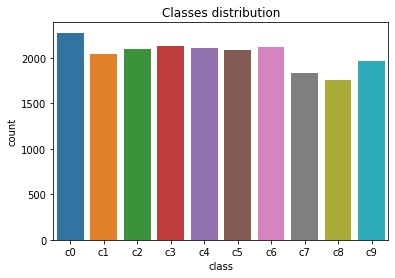

In [ ]:
d = {"img" : [], "class" : []}
for c in classes:
    imgs = [img for img in os.listdir(os.path.join(filepath+"train",c)) if not img.startswith(".")]
    for img in imgs:
        d["img"].append(img)
        d["class"].append(c)
df = pd.DataFrame(d)
ax = sns.countplot(data=df,x="class")
ax.set(title="Classes distribution")
print("Total number of training data :",len(df))

# Test data Creation

In [ ]:
testimgnames = [f for f in os.listdir(filepath+"TestData/") if os.path.isfile(os.path.join(filepath+"TestData/", f))]

In [ ]:
len(testimgnames)

2019

In [ ]:
for filename in testimgnames:
  shutil.copy2(glob(filepath+"TestData/"+filename)[0], filepath+"TestData/"+dataList[dataList['img'] == filename]["classname"].iloc[0])

In [ ]:
for fname in testimgnames:
    os.remove(glob(filepath+"TestData/"+fname)[0])

In [ ]:
str(len(glob(filepath+'TestData/*.jpg')))

'0'

In [ ]:
str(len(glob(filepath+'TestData/*/*.jpg')))

'2019'

Total number of test data : 2019


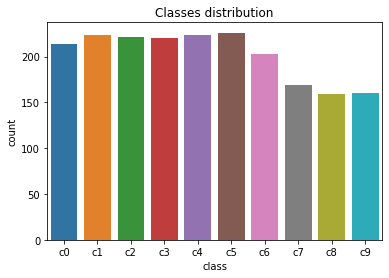

In [ ]:
d = {"img" : [], "class" : []}
for c in classes:
    imgs = [img for img in os.listdir(os.path.join(filepath+"TestData",c)) if not img.startswith(".")]
    for img in imgs:
        d["img"].append(img)
        d["class"].append(c)
df = pd.DataFrame(d)
ax = sns.countplot(data=df,x="class")
ax.set(title="Classes distribution")
print("Total number of test data :",len(df))